In [1]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# MySQL table import

In [130]:
# Importa del archivo .env los datos de conexión a MySQl de forma segura
load_dotenv()
host = os.getenv('host')
database = os.getenv('database')
user = os.getenv('user')
port = os.getenv('port')
password = os.getenv('password')

In [3]:
# Crea la conexión a la base de datos MySQL utilizando la bublioteca SQLAlchemy
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')

In [4]:
# Fuerza que se muestren todas las columnas de los dataframes
pd.set_option('display.max_columns', None)

# Importa la tabla limpia de MySQL accident
accident = pd.read_sql('SELECT * from final_project.accident', con=engine,dtype='object')

# Importa la tabla limpia de MySQL distract
distract = pd.read_sql('SELECT * from final_project.distract', con=engine,dtype='object')

# Importa la tabla limpia de MySQL drugs
drugs = pd.read_sql('SELECT * from final_project.drugs', con=engine,dtype='object')

# Importa la tabla limpia de MySQL maneuver
maneuver = pd.read_sql('SELECT * from final_project.maneuver', con=engine,dtype='object')

# Importa la tabla limpia de MySQL person
person = pd.read_sql('SELECT * from final_project.person', con=engine,dtype='object')

# Importa la tabla limpia de MySQL vehicle
vehicle = pd.read_sql('SELECT * from final_project.vehicle', con=engine,dtype='object')

# Importa la tabla limpia de MySQL weather
weather = pd.read_sql('SELECT * from final_project.weather', con=engine,dtype='object')

# ABT & final dataframe creation

### 'person' edition

In [5]:
# Elimina las columnas innecesarias de 'person'
columns_to_drop = ['ID', 'PER_NO', 'VEH_NO', 'TYPE_OF_PERSON', 'INJ_SEV', 'SEAT_POS', 'REST_MIS', 'HELM_MIS', 'DRINKING']
person = person.drop(columns=columns_to_drop)

In [6]:
# Convierte la columna categórica SEX en booleana
person = pd.get_dummies(person, columns = ['SEX', 'TYPE_OF_PERSONNAME', 'INJ_SEVNAME', 'SEAT_POSNAME', 'REST_MISNAME', 'HELM_MISNAME', 'DRINKINGNAME'])

In [7]:
# Crea una función que suma los 'True' de los valores booleanos
def true_sum(series):
    return series.sum()

In [8]:
# Agrupa la tabla 'person' creando medias según la edad de todos los pasajeros en cada accidente y completa con 0 o 1 el resto de valores categóricos
person = person.groupby('ST_CASE').agg({'AGE':'mean', 'SEX_Female':true_sum, 'SEX_Male':true_sum, 'SEX_Unknown':true_sum, 'TYPE_OF_PERSONNAME_Bicyclist':true_sum,\
    'TYPE_OF_PERSONNAME_Bicyclist or similar':true_sum, 'TYPE_OF_PERSONNAME_Driver':true_sum, 'TYPE_OF_PERSONNAME_Occupant parked vehicle':true_sum, 'TYPE_OF_PERSONNAME_Passenger':true_sum,\
        'TYPE_OF_PERSONNAME_Pedestrian':true_sum, 'TYPE_OF_PERSONNAME_Person in a building':true_sum, 'TYPE_OF_PERSONNAME_Unknown':true_sum, 'INJ_SEVNAME_Died Prior to Crash':true_sum,\
            'INJ_SEVNAME_Fatal Injury':true_sum, 'INJ_SEVNAME_Injured, Severity Unknown':true_sum, 'INJ_SEVNAME_No Apparent Injury':true_sum, 'INJ_SEVNAME_Possible Injury':true_sum,\
                'INJ_SEVNAME_Suspected Minor Injury':true_sum, 'INJ_SEVNAME_Suspected Serious Injury':true_sum, 'INJ_SEVNAME_Unknown/Not Reported':true_sum, 'SEAT_POSNAME_Back':true_sum,\
                    'SEAT_POSNAME_Back left':true_sum, 'SEAT_POSNAME_Back middle':true_sum, 'SEAT_POSNAME_Back right':true_sum, 'SEAT_POSNAME_Front':true_sum, 'SEAT_POSNAME_Front left':true_sum,\
                        'SEAT_POSNAME_Front middle':true_sum, 'SEAT_POSNAME_Front right':true_sum, 'SEAT_POSNAME_Not regular vehicle':true_sum, 'SEAT_POSNAME_Unknown':true_sum, 'REST_MISNAME_No Indication of Misuse':true_sum,\
                            'REST_MISNAME_None Used/Not Applicable':true_sum, 'REST_MISNAME_Not a Motor Vehicle Occupant':true_sum, 'REST_MISNAME_Yes, Indication of Misuse':true_sum,\
                                'HELM_MISNAME_No Indication of Misuse':true_sum, 'HELM_MISNAME_None Used/Not Applicable':true_sum, 'HELM_MISNAME_Not a Motor Vehicle Occupant':true_sum,\
                                    'HELM_MISNAME_Yes, Indication of Misuse':true_sum, 'DRINKINGNAME_No (Alcohol Not Involved)':true_sum,'DRINKINGNAME_Not Reported':true_sum, 'DRINKINGNAME_Reported as Unknown':true_sum,\
                                        'DRINKINGNAME_Yes (Alcohol Involved)':true_sum}).reset_index()

In [9]:
# Elimina las columnas innecesarias de 'person'
columns_to_drop = ['SEX_Unknown', 'TYPE_OF_PERSONNAME_Unknown', 'INJ_SEVNAME_Unknown/Not Reported', 'SEAT_POSNAME_Unknown', 'REST_MISNAME_No Indication of Misuse', 'REST_MISNAME_None Used/Not Applicable',\
    'REST_MISNAME_Not a Motor Vehicle Occupant', 'HELM_MISNAME_No Indication of Misuse', 'HELM_MISNAME_None Used/Not Applicable', 'HELM_MISNAME_Not a Motor Vehicle Occupant', 'DRINKINGNAME_No (Alcohol Not Involved)',\
        'DRINKINGNAME_Not Reported', 'DRINKINGNAME_Reported as Unknown']
person = person.drop(columns=columns_to_drop)

In [10]:
person = person.rename(columns={'AGE':'Age', 'SEX_Female':'Female', 'SEX_Male':'Male', 'TYPE_OF_PERSONNAME_Bicyclist':'Bicyclist', 'TYPE_OF_PERSONNAME_Bicyclist or similar':'Similar_To_Bicyclist',\
    'TYPE_OF_PERSONNAME_Driver':'Driver', 'TYPE_OF_PERSONNAME_Occupant parked vehicle':'Occupant_Parked_Vehicle', 'TYPE_OF_PERSONNAME_Passenger':'Passenger', 'TYPE_OF_PERSONNAME_Pedestrian':'Pedestrian',\
        'TYPE_OF_PERSONNAME_Person in a building':'Person_In_A_Building', 'INJ_SEVNAME_Died Prior to Crash':'Died_Prior_To_Crash', 'INJ_SEVNAME_Fatal Injury':'Fatal_Injury',\
            'INJ_SEVNAME_Injured, Severity Unknown': 'Injured_Severity_Unknown', 'INJ_SEVNAME_Injured,\Severity Unknown':'Injured_Severity_Unknown', 'INJ_SEVNAME_No Apparent Injury':'No_Apparent_Injury',\
                'INJ_SEVNAME_Possible Injury':'Possible_Injury', 'INJ_SEVNAME_Suspected Minor Injury':'Suspected_Minor_Injury', 'INJ_SEVNAME_Suspected Serious Injury':'Suspected_Serious_Injury', 'SEAT_POSNAME_Back':'Seat_Back',\
                    'SEAT_POSNAME_Back left':'Seat_Back_Left', 'SEAT_POSNAME_Back middle':'Seat_Back_Middle', 'SEAT_POSNAME_Back right':'Seat_Back_Right', 'SEAT_POSNAME_Front':'Seat_Front',\
                        'SEAT_POSNAME_Front left':'Seat_Front_Left', 'SEAT_POSNAME_Front middle':'Seat_Front_Middle', 'SEAT_POSNAME_Front right':'Seat_Front_Right', 'SEAT_POSNAME_Not regular vehicle':'Seat_Not_Regular_Vehicle',\
                            'REST_MISNAME_Yes, Indication of Misuse':'Restraint_Misuse', 'HELM_MISNAME_Yes, Indication of Misuse':'Helm_Misuse', 'DRINKINGNAME_Yes (Alcohol Involved)':'Drinking_Involved'})

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\perez\AppData\Local\Temp\ipykernel_18688\2662490717.py:4: SyntaxWarning: invalid escape sequence '\S'
  'INJ_SEVNAME_Injured, Severity Unknown': 'Injured_Severity_Unknown', 'INJ_SEVNAME_Injured,\Severity Unknown':'Injured_Severity_Unknown', 'INJ_SEVNAME_No Apparent Injury':'No_Apparent_Injury',\


### 'vehicle' edition

In [11]:
# Elimina las columnas innecesarias de 'vehicle'
columns_to_drop = ['ID', 'VEH_NO', 'VEHICLE_TYPE', 'VEHICLE_MANUFACTURER',  'VEHICLE_MANUFACTURERNAME', 'VEHICLE_MODEL', 'VEHICLE_MODELNAME', 'VEHICLE_CLASS', 'VEHICLE_CLASSNAME', 'VEHICLE_WEIGHT', 'BUS_USE', 'BUS_USENAME',\
    'SPEC_USE', 'SPEC_USENAME', 'EMER_USE', 'EMER_USENAME', 'NUMOCCS', 'ROLLOVER', 'ROLLOVERNAME', 'ROLINLOC', 'ROLINLOCNAME', 'IMPACT1', 'TOWED', 'TOWEDNAME', 'ROAD_CONDITION', 'ACC_TYPE', 'DRIVERS_PRESENCE',\
        'DRIVERS_PRESENCENAME', 'LICENSE_COMPLIANCE', 'LICENSE_RESTRICTION', 'SPEEDREL', 'HIT_RUN']
vehicle = vehicle.drop(columns=columns_to_drop)

In [12]:
# Convierte las columnas categóricas en booleanas
vehicle = pd.get_dummies(vehicle, columns = ['VEHICLE_TYPENAME', 'VEHICLE_WEIGHTNAME', 'IMPACT1NAME', 'ROAD_CONDITIONNAME', 'ACC_TYPENAME', 'LICENSE_COMPLIANCENAME', 'LICENSE_RESTRICTIONNAME', 'SPEEDRELNAME', 'HIT_RUNNAME'])

In [13]:
# Filtra los valores de 'PREVIOUS_ACCIDENT' de 'vehicle' para eliminar los outliers que son posiblemente errores
vehicle = vehicle[(vehicle['PREVIOUS_ACCIDENT'] < 50)]

In [14]:
# Filtra los valores de MOD_YEAR entre 1900 y 2022
vehicle = vehicle[(vehicle['MOD_YEAR'] >= 1900) & (vehicle['MOD_YEAR'] <= 2022)]

In [15]:
# Elimina las columnas innecesarias de 'vehicle'
columns_to_drop = ['VEHICLE_TYPENAME_Not Reported', 'VEHICLE_WEIGHTNAME_Unknown', 'IMPACT1NAME_Unknown', 'ROAD_CONDITIONNAME_Unknown', 'ACC_TYPENAME_Specifics Unknown', 'ACC_TYPENAME_Unknown', 'LICENSE_COMPLIANCENAME_Unknown',\
    'LICENSE_COMPLIANCENAME_Valid license for this class vehicle', 'LICENSE_RESTRICTIONNAME_Restrictions Complied With', 'LICENSE_RESTRICTIONNAME_Restrictions, Compliance Unknown', 'LICENSE_RESTRICTIONNAME_Unknown',\
        'SPEEDRELNAME_Unknown']
vehicle = vehicle.drop(columns=columns_to_drop)

In [16]:
# Agrupa la tabla 'vehicle' creando medias de todos los valores numéricos y completa con 0 o 1 los valores categóricos
vehicle = vehicle.groupby('ST_CASE').agg({'MOD_YEAR':'mean', 'PREVIOUS_ACCIDENT':'mean', 'PREVIOUS_SUSPENSION':'mean', 'PREVIOUS_DRIVING_WHILE_INTOXIDATED':'mean', 'PREVIOUS_SPEED_CONVICT':'mean',\
    'VEHICLE_TYPENAME_2-door sedan':true_sum, 'VEHICLE_TYPENAME_All-Terrain Cycle':true_sum, 'VEHICLE_TYPENAME_Body type':true_sum, 'VEHICLE_TYPENAME_Bus':true_sum, 'VEHICLE_TYPENAME_Cab Chassis Based':true_sum,\
        'VEHICLE_TYPENAME_Compact Utility':true_sum, 'VEHICLE_TYPENAME_Convertible':true_sum, 'VEHICLE_TYPENAME_Coupe':true_sum, 'VEHICLE_TYPENAME_Golf Cart':true_sum, 'VEHICLE_TYPENAME_Large utility':true_sum,\
            'VEHICLE_TYPENAME_Low Speed Vehicle':true_sum, 'VEHICLE_TYPENAME_Minivan':true_sum, 'VEHICLE_TYPENAME_Moped':true_sum, 'VEHICLE_TYPENAME_Motor Scooter':true_sum, 'VEHICLE_TYPENAME_Motor home':true_sum,\
                'VEHICLE_TYPENAME_Motorcycle':true_sum, 'VEHICLE_TYPENAME_Motored cycle type':true_sum, 'VEHICLE_TYPENAME_Pickup':true_sum, 'VEHICLE_TYPENAME_Recreational Off-Highway Vehicle':true_sum,\
                    'VEHICLE_TYPENAME_School Bus':true_sum, 'VEHICLE_TYPENAME_Sedan':true_sum, 'VEHICLE_TYPENAME_Snowmobile':true_sum, 'VEHICLE_TYPENAME_Solar electric':true_sum, 'VEHICLE_TYPENAME_Station Wagon':true_sum,\
                        'VEHICLE_TYPENAME_Truck':true_sum, 'VEHICLE_TYPENAME_Truck-tractor':true_sum, 'VEHICLE_TYPENAME_Utility vehicle':true_sum, 'VEHICLE_TYPENAME_Van':true_sum, 'VEHICLE_TYPENAME_Van-Based Bus GVWR':true_sum,\
                            'VEHICLE_WEIGHTNAME_11,794 - 14,969 kg':true_sum, 'VEHICLE_WEIGHTNAME_14,969 kg and above':true_sum, 'VEHICLE_WEIGHTNAME_2,722 - 4,536 kg':true_sum, 'VEHICLE_WEIGHTNAME_2,722 kg or less':true_sum,\
                                'VEHICLE_WEIGHTNAME_4,536 - 6,350 kg':true_sum, 'VEHICLE_WEIGHTNAME_6,350 - 7,258 kg':true_sum, 'VEHICLE_WEIGHTNAME_7,258 - 8,845 kg':true_sum, 'VEHICLE_WEIGHTNAME_8,845 - 11,794 kg':true_sum,\
                                    'IMPACT1NAME_Back':true_sum, 'IMPACT1NAME_Front':true_sum, 'IMPACT1NAME_Left':true_sum, 'IMPACT1NAME_Left-Back':true_sum, 'IMPACT1NAME_Left-Front':true_sum,\
                                        'IMPACT1NAME_Non-Collision':true_sum, 'IMPACT1NAME_Right':true_sum, 'IMPACT1NAME_Right-Back':true_sum, 'IMPACT1NAME_Right-Front':true_sum, 'IMPACT1NAME_Top':true_sum,\
                                            'IMPACT1NAME_Undercarriage':true_sum, 'IMPACT1NAME_Vehicle, Objects or Person Set-in-motion':true_sum, 'ROAD_CONDITIONNAME_Dry':true_sum, 'ROAD_CONDITIONNAME_Ice':true_sum,\
                                                'ROAD_CONDITIONNAME_Mud, Dirt or Gravel':true_sum, 'ROAD_CONDITIONNAME_Non-Trafficway':true_sum, 'ROAD_CONDITIONNAME_Oil':true_sum, 'ROAD_CONDITIONNAME_Snow':true_sum,\
                                                    'ROAD_CONDITIONNAME_Water':true_sum, 'ROAD_CONDITIONNAME_Wet':true_sum, 'ACC_TYPENAME_Avoid Collision With Object':true_sum,\
                                                        'ACC_TYPENAME_Avoid Collision With Veh., Ped., Anim.':true_sum, 'ACC_TYPENAME_Avoid Collision With Vehicle':true_sum,\
                                                            'ACC_TYPENAME_Avoid Collision with Vehicle':true_sum, 'ACC_TYPENAME_Backing Veh.':true_sum, 'ACC_TYPENAME_Changing Lanes to the Left':true_sum,\
                                                                'ACC_TYPENAME_Changing Lanes to the Right':true_sum, 'ACC_TYPENAME_Control/Traction Loss':true_sum, 'ACC_TYPENAME_Decelerating (Slowing)':true_sum,\
                                                                    'ACC_TYPENAME_Decelerating (Slowing), Going Left':true_sum, 'ACC_TYPENAME_Decelerating (Slowing), Going Right':true_sum,\
                                                                        'ACC_TYPENAME_Decelerating (Slowing), Going Straight':true_sum, 'ACC_TYPENAME_Drive Off Road':true_sum, 'ACC_TYPENAME_End Departure':true_sum,\
                                                                            'ACC_TYPENAME_Initial Opposite Directions (Going Straight)':true_sum, 'ACC_TYPENAME_Initial Opposite Directions (Left/Right)':true_sum,\
                                                                                'ACC_TYPENAME_Initial Same Directions (Going Straight)':true_sum, 'ACC_TYPENAME_Initial Same Directions (Turning Left)':true_sum,\
                                                                                    'ACC_TYPENAME_Initial Same Directions (Turning Right)':true_sum, 'ACC_TYPENAME_Lateral Move (Going Straight)':true_sum,\
                                                                                        'ACC_TYPENAME_Lateral Move (Left/Right)':true_sum, 'ACC_TYPENAME_No Impact':true_sum, 'ACC_TYPENAME_Other Crash Type':true_sum,\
                                                                                            'ACC_TYPENAME_Other Vehicle':true_sum, 'ACC_TYPENAME_Parked Veh.':true_sum, 'ACC_TYPENAME_Pedestrian/ Animal':true_sum,\
                                                                                                'ACC_TYPENAME_Slower':true_sum, 'ACC_TYPENAME_Slower, Going Left':true_sum, 'ACC_TYPENAME_Slower, Going Right':true_sum,\
                                                                                                    'ACC_TYPENAME_Slower, Going Straight':true_sum, 'ACC_TYPENAME_Specifics Other':true_sum, 'ACC_TYPENAME_Sta. Object':true_sum,\
                                                                                                        'ACC_TYPENAME_Stopped':true_sum, 'ACC_TYPENAME_Straight Ahead on Left':true_sum,\
                                                                                                            'ACC_TYPENAME_Straight Ahead on Left/Right':true_sum, 'ACC_TYPENAME_Striking from the Left':true_sum,\
                                                                                                                'ACC_TYPENAME_Striking from the Right':true_sum, 'ACC_TYPENAME_Struck on the Right':true_sum,\
                                                                                                                    'ACC_TYPENAME_Struck on the left':true_sum,\
                                                                                                                        'ACC_TYPENAME_Turn Into Opposite Directions (Going Straight)':true_sum,\
                                                                                                                            'ACC_TYPENAME_Turn Into Opposite Directions (Turning Left)':true_sum,\
                                                                                                                                'ACC_TYPENAME_Turn Into Opposite Directions (Turning Right)':true_sum,\
                                                                                                                                    'ACC_TYPENAME_Turn Into Same Direction (Going Straight)':true_sum,\
                                                                                                                                        'ACC_TYPENAME_Turn Into Same Direction (Turning Left)':true_sum,\
                                                                                                                                            'ACC_TYPENAME_Turn Into Same Direction (Turning Right)':true_sum,\
                                                                                                                                                'LICENSE_COMPLIANCENAME_No Driver Present/Unknown if Driver Present':true_sum,\
                                                                                                                                                    'LICENSE_COMPLIANCENAME_No license required for this class vehicle':true_sum,\
                                                                                                                                                        'LICENSE_COMPLIANCENAME_No valid license for this class vehicle':true_sum,\
                                                                                                                                                            'LICENSE_COMPLIANCENAME_Not licensed':true_sum,\
                                                                                                                                                                'LICENSE_RESTRICTIONNAME_No Driver Present/Unknown if Driver Present':true_sum,\
                                                                                                                                                                    'LICENSE_RESTRICTIONNAME_No Restrictions or Not Applicable':true_sum,\
                                                                                                                                                                        'LICENSE_RESTRICTIONNAME_Restrictions Not Complied With':true_sum,\
                                                                                                                                                                            'SPEEDRELNAME_No':true_sum, 'SPEEDRELNAME_Yes':true_sum,\
                                                                                                                                                                                'HIT_RUNNAME_No':true_sum, 'HIT_RUNNAME_Yes':true_sum})\
                                                                                                                                                                                    .reset_index()

In [17]:
vehicle = vehicle.rename(columns={'MOD_YEAR':'Model_Year', 'PREVIOUS_ACCIDENT':'Previous_Accident', 'PREVIOUS_SUSPENSION':'Previous_Suspension', 'PREVIOUS_DRIVING_WHILE_INTOXIDATED':'Previous_Driving_Intoxidated',\
    'PREVIOUS_SPEED_CONVICT':'Previous_Speed_Convict', 'VEHICLE_TYPENAME_2-door sedan':'Veh_Sedan_2', 'VEHICLE_TYPENAME_All-Terrain Cycle':'Veh_All_Terrain_Cycle', 'VEHICLE_TYPENAME_Body type':'Veh_Utility_2',\
        'VEHICLE_TYPENAME_Bus':'Veh_Bus', 'VEHICLE_TYPENAME_Cab Chassis Based':'Veh_Cab_Chassis_Based', 'VEHICLE_TYPENAME_Compact Utility':'Veh_Compact_Utility', 'VEHICLE_TYPENAME_Convertible':'Veh_Convertible',\
            'VEHICLE_TYPENAME_Coupe':'Veh_Coupe', 'VEHICLE_TYPENAME_Golf Cart':'Veh_Golf_cart', 'VEHICLE_TYPENAME_Large utility':'Veh_Large_Utility', 'VEHICLE_TYPENAME_Low Speed Vehicle':'Veh_Low_Speed',\
                'VEHICLE_TYPENAME_Minivan':'Veh_Minivan', 'VEHICLE_TYPENAME_Moped':'Veh_Moped', 'VEHICLE_TYPENAME_Motor Scooter':'Veh_Motor_Scooter', 'VEHICLE_TYPENAME_Motor home':'Veh_Motor_Home',\
                    'VEHICLE_TYPENAME_Motorcycle':'Veh_Motorcycle', 'VEHICLE_TYPENAME_Motored cycle type':'Veh_Motorcycle_2', 'VEHICLE_TYPENAME_Pickup':'Veh_Pickup',\
                        'VEHICLE_TYPENAME_Recreational Off-Highway Vehicle':'Veh_Recreational_OffHighWay', 'VEHICLE_TYPENAME_School Bus':'Veh_SchoolBus', 'VEHICLE_TYPENAME_Sedan':'Veh_Sedan',\
                            'VEHICLE_TYPENAME_Snowmobile':'Veh_Snowmobile', 'VEHICLE_TYPENAME_Solar electric':'Veh_Solar_Electric', 'VEHICLE_TYPENAME_Station Wagon':'Veh_Station_Wagon', 'VEHICLE_TYPENAME_Truck':'Veh_Truck',\
                                'VEHICLE_TYPENAME_Truck-tractor':'Veh_TruckTractor', 'VEHICLE_TYPENAME_Utility vehicle':'Veh_Utility', 'VEHICLE_TYPENAME_Van':'Veh_Van', 'VEHICLE_TYPENAME_Van-Based Bus GVWR':'Veh_VanBus',\
                                    'VEHICLE_WEIGHTNAME_11,794 - 14,969 kg':'11,794-14,969 kg', 'VEHICLE_WEIGHTNAME_14,969 kg and above':'14,969 kg and above', 'VEHICLE_WEIGHTNAME_2,722 - 4,536 kg':'2,722-4,536 kg',\
                                        'VEHICLE_WEIGHTNAME_2,722 kg or less':'2,722 kg or less', 'VEHICLE_WEIGHTNAME_4,536 - 6,350 kg':'4,536-6,350 kg', 'VEHICLE_WEIGHTNAME_6,350 - 7,258 kg':'6,350-7,258 kg',\
                                            'VEHICLE_WEIGHTNAME_7,258 - 8,845 kg':'7,258-8,845 kg', 'VEHICLE_WEIGHTNAME_8,845 - 11,794 kg':'8,845-11,794 kg', 'IMPACT1NAME_Back':'Impact_Back', 'IMPACT1NAME_Front':'Impact_Front',\
                                                'IMPACT1NAME_Left':'Impact_Left', 'IMPACT1NAME_Left-Back':'Impact_Left_Back', 'IMPACT1NAME_Left-Front':'Impact_Left_Back_Front', 'IMPACT1NAME_Non-Collision':'Impact_Non_Collision',\
                                                    'IMPACT1NAME_Right':'Impact_Right', 'IMPACT1NAME_Right-Back':'Impact_Right_Back', 'IMPACT1NAME_Right-Front':'Impact_Right_Front', 'IMPACT1NAME_Top':'Impact_Top',\
                                                        'IMPACT1NAME_Undercarriage':'Impact_Undercarriage', 'IMPACT1NAME_Vehicle, Objects or Person Set-in-motion':'Impact_Obj_or_Person_In_Motion',\
                                                            'ROAD_CONDITIONNAME_Dry':'Road_Dry', 'ROAD_CONDITIONNAME_Ice':'Road_Ice', 'ROAD_CONDITIONNAME_Mud, Dirt or Gravel':'Road_Mud_Dirt_or_Gravel',\
                                                                'ROAD_CONDITIONNAME_Non-Trafficway':'Road_NonTrafficway', 'ROAD_CONDITIONNAME_Oil':'Road_Oil', 'ROAD_CONDITIONNAME_Snow':'Road_Snow',\
                                                                    'ROAD_CONDITIONNAME_Water':'Road_Water', 'ROAD_CONDITIONNAME_Wet':'Road_Wet', 'ACC_TYPENAME_Avoid Collision With Object':'Acc_Avoid_Collision_Obj',\
                                                                        'ACC_TYPENAME_Avoid Collision With Veh., Ped., Anim.':'Acc_Avoid_Collision_Ped_or_Anim', 'ACC_TYPENAME_Avoid Collision With Vehicle':'Acc_Avoid_Collision_Veh',\
                                                                            'ACC_TYPENAME_Avoid Collision with Vehicle':'Acc_Avoid_Collision_Veh', 'ACC_TYPENAME_Backing Veh.':'Acc_Backing_Veh',\
                                                                                'ACC_TYPENAME_Changing Lanes to the Left':'Acc_Changing_Lanes_to_Left', 'ACC_TYPENAME_Changing Lanes to the Right':'Acc_Changing_Lanes_to_Right',\
                                                                                    'ACC_TYPENAME_Control/Traction Loss':'Acc_Control_Loss', 'ACC_TYPENAME_Decelerating (Slowing)':'Acc_Decelerating',\
                                                                                        'ACC_TYPENAME_Decelerating (Slowing), Going Left':'Acc_Decelerating_to_Left',\
                                                                                            'ACC_TYPENAME_Decelerating (Slowing), Going Right':'Acc_Decelerating_to_Right',\
                                                                                                'ACC_TYPENAME_Decelerating (Slowing), Going Straight':'Acc_Decelerating_to_Straight',\
                                                                                                    'ACC_TYPENAME_Drive Off Road':'Acc_Drive_Off_Road', 'ACC_TYPENAME_End Departure':'Acc_End_Departure',\
                                                                                                        'ACC_TYPENAME_Initial Opposite Directions (Going Straight)':'Acc_Opposite_Dir_to_Straight',\
                                                                                                            'ACC_TYPENAME_Initial Opposite Directions (Left/Right)':'Acc_Opposite_Dir_to_Left_or_Right',\
                                                                                                                'ACC_TYPENAME_Initial Same Directions (Going Straight)':'Acc_Same_Dir_to_Straight',\
                                                                                                                    'ACC_TYPENAME_Initial Same Directions (Turning Left)':'Acc_Same_Dir_to_Left',\
                                                                                                                        'ACC_TYPENAME_Initial Same Directions (Turning Right)':'Acc_Same_Dir_to_Right',\
                                                                                                                            'ACC_TYPENAME_Lateral Move (Going Straight)':'Acc_Lateral_Move_to_Straight',\
                                                                                                                                'ACC_TYPENAME_Lateral Move (Left/Right)':'Acc_Lateral_Move_to_Left_or_Right',\
                                                                                                                                    'ACC_TYPENAME_No Impact':'Acc_No_Impact', 'ACC_TYPENAME_Other Crash Type':'Acc_Other_Crash',\
                                                                                                                                        'ACC_TYPENAME_Other Vehicle':'Acc_Other_Veh', 'ACC_TYPENAME_Parked Veh.':'Acc_Parked_Veh',\
                                                                                                                                            'ACC_TYPENAME_Pedestrian/ Animal':'Acc_Ped_or_Animal',\
                                                                                                                                                'ACC_TYPENAME_Slower':'Acc_Slower',\
                                                                                                                                                    'ACC_TYPENAME_Slower, Going Left':'Acc_Slower_to_Left',\
                                                                                                                                                        'ACC_TYPENAME_Slower, Going Right':'Acc_Slower_to_Right',\
                                                                                                                                                            'ACC_TYPENAME_Slower, Going Straight':'Acc_Slower_to_Straight',\
                                                                                                                                                                'ACC_TYPENAME_Specifics Other':'Acc_Specifics_Other',\
                                                                                                                                                                    'ACC_TYPENAME_Sta. Object':'Acc_StaObj',\
                                                                                                                                                                        'ACC_TYPENAME_Stopped':'Acc_Stopped',\
                                                                                                                                                                            'ACC_TYPENAME_Stopped, Left':'Acc_Stopped_Left',\
                                                                                                                                                                                'ACC_TYPENAME_Stopped, Right':'Acc_Stopped_Right',\
                                                                                                                                                                                    'ACC_TYPENAME_Stopped, Straight':'Acc_Stopped_Straight',\
                                                                                                                                                                                        'ACC_TYPENAME_Straight Ahead on Left':'Acc_Stopped_Ahead_Left',\
                                                                                                                                                                                            'ACC_TYPENAME_Straight Ahead on Left/Right':'Acc_Stopped_Ahead_Right',\
                                                                                                                                                                                                'ACC_TYPENAME_Striking from the Left':'Acc_Striking_from_Left',\
                                                                                                                                                                                                    'ACC_TYPENAME_Striking from the Right':'Acc_Striking_from_Right',\
                                                                                                                                                                                                        'ACC_TYPENAME_Struck on the Right':'Acc_Struck_on_Right',\
                                                                                                                                                                                                            'ACC_TYPENAME_Struck on the left':'Acc_Struck_on_Left',\
                                                                                                                                                                                                                'ACC_TYPENAME_Turn Into Opposite Directions (Going Straight)':'Acc_Turn_to_Opposite_Dir_to_Straight',\
                                                                                                                                                                                                                    'ACC_TYPENAME_Turn Into Opposite Directions (Turning Left)':'Acc_Turn_to_Opposite_Dir_to_Left',\
                                                                                                                                                                                                                        'ACC_TYPENAME_Turn Into Opposite Directions (Turning Right)':'Acc_Turn_to_Opposite_Dir_to_Right',\
                                                                                                                                                                                                                            'ACC_TYPENAME_Turn Into Same Direction (Going Straight)':'Acc_Turn_to_Same_Dir_to_Straight',\
                                                                                                                                                                                                                                'ACC_TYPENAME_Turn Into Same Direction (Turning Left)':'Acc_Turn_to_Same_Dir_to_Left',\
                                                                                                                                                                                                                                    'ACC_TYPENAME_Turn Into Same Direction (Turning Right)':'Acc_Turn_to_Same_Dir_to_Right',\
                                                                                                                                                                                                                                        'LICENSE_COMPLIANCENAME_No Driver Present/Unknown if Driver Present':'License_Compl_Unknown',\
                                                                                                                                                                                                                                            'LICENSE_COMPLIANCENAME_No license required for this class vehicle':'License_Compl_No_Required',\
                                                                                                                                                                                                                                                'LICENSE_COMPLIANCENAME_No valid license for this class vehicle':'License_Compl_No_Valid',\
                                                                                                                                                                                                                                                    'LICENSE_COMPLIANCENAME_Not licensed':'License_Compl_No',\
                                                                                                                                                                                                                                                        'LICENSE_RESTRICTIONNAME_No Driver Present/Unknown if Driver Present':'License_Restriction_Unknown',\
                                                                                                                                                                                                                                                            'LICENSE_RESTRICTIONNAME_No Restrictions or Not Applicable':'License_Restriction_Not_Applicable',\
                                                                                                                                                                                                                                                                'LICENSE_RESTRICTIONNAME_Restrictions Not Complied With':'License_Restriction_Not_Complied',\
                                                                                                                                                                                                                                                                    'SPEEDRELNAME_No':'High_Speed_No', 'SPEEDRELNAME_Yes':'High_Speed_Yes',\
                                                                                                                                                                                                                                                                        'HIT_RUNNAME_No':'Hit_Run_No', 'HIT_RUNNAME_Yes':'Hit_Run_Yes'})

### 'distract' edition

In [18]:
# Elimina las columnas innecesarias de 'distract'
columns_to_drop = ['ID', 'VEH_NO', 'DRDISTRACT']
distract = distract.drop(columns=columns_to_drop)

In [19]:
# Convierte las columnas categóricas en booleanas
distract = pd.get_dummies(distract, columns = ['DRDISTRACTNAME'])

In [20]:
# Agrupa la tabla 'ditract' completando con 0 o 1 los valores categóricos
distract = distract.groupby('ST_CASE').agg({'DRDISTRACTNAME_Distraction':true_sum, 'DRDISTRACTNAME_Eating/Drinking':true_sum, 'DRDISTRACTNAME_Mobile':true_sum, 'DRDISTRACTNAME_Not Distracted':true_sum,\
    'DRDISTRACTNAME_Smoking':true_sum, 'DRDISTRACTNAME_Unknown':true_sum}).reset_index()

In [21]:
# Elimina las columnas innecesarias de 'distract'
columns_to_drop = ['DRDISTRACTNAME_Unknown', 'DRDISTRACTNAME_Not Distracted', 'DRDISTRACTNAME_Distraction']
distract = distract.drop(columns=columns_to_drop)

In [22]:
# Cambia los nombres de las columnas
distract = distract.rename(columns={'DRDISTRACTNAME_Eating/Drinking':'Distraction_Eating_Drinking', 'DRDISTRACTNAME_Mobile':'Distraction_Mobile', 'DRDISTRACTNAME_Smoking':'Distraction_Smoking'})

### 'drugs' edition

In [23]:
# Elimina las columnas innecesarias de 'drugs'
columns_to_drop = ['ID', 'VEH_NO', 'PER_NO', 'DRUGRES']
drugs = drugs.drop(columns=columns_to_drop)

In [24]:
# Convierte las columnas categóricas en booleanas
drugs = pd.get_dummies(drugs, columns = ['DRUGRESNAME'])

In [25]:
# Elimina las columnas innecesarias de 'drugs'
columns_to_drop = ['DRUGRESNAME_Unknown', 'DRUGRESNAME_Negative']
drugs = drugs.drop(columns=columns_to_drop)

In [26]:
# Agrupa la tabla 'drugs' completando con 0 o 1 los valores categóricos
drugs = drugs.groupby('ST_CASE').agg({'DRUGRESNAME_Anesthetic':true_sum, 'DRUGRESNAME_Antidepressant':true_sum, 'DRUGRESNAME_Antipsychotic':true_sum, 'DRUGRESNAME_Barbiturate':true_sum,\
    'DRUGRESNAME_Depressant':true_sum, 'DRUGRESNAME_OTC Analgesic':true_sum, 'DRUGRESNAME_Opioid':true_sum, 'DRUGRESNAME_Other':true_sum, 'DRUGRESNAME_Stimulant':true_sum,\
        'DRUGRESNAME_Synthetic Cannabinoid':true_sum})

In [27]:
# Cambia el nombre de las columnas
drugs = drugs.rename(columns={'DRUGRESNAME_Anesthetic':'Drug_Anesthetic', 'DRUGRESNAME_Antidepressant':'Drugs_Antidepressant', 'DRUGRESNAME_Antipsychotic':'Drugs_Antipsychotic', 'DRUGRESNAME_Barbiturate':'Drugs_Barbiturate',\
    'DRUGRESNAME_Depressant':'Drugs_Depressant', 'DRUGRESNAME_OTC Analgesic':'Drugs_OTC_Analgesic', 'DRUGRESNAME_Opioid':'Drugs_Opioid', 'DRUGRESNAME_Other':'Drugs_Other', 'DRUGRESNAME_Stimulant':'Drugs_Stimulant',\
        'DRUGRESNAME_Synthetic Cannabinoid':'Drugs_Synthetic_Cannabinoid'}).reset_index()

### 'maneuver' edition

In [28]:
# Elimina las columnas innecesarias de 'maneuver'
columns_to_drop = ['ID', 'VEH_NO', 'MANEUVER']
maneuver = maneuver.drop(columns=columns_to_drop)

In [29]:
# Convierte las columnas categóricas en booleanas
maneuver = pd.get_dummies(maneuver, columns = ['MANEUVERNAME'])

In [30]:
# Elimina las columnas innecesarias de 'maneuver'
columns_to_drop = ['MANEUVERNAME_Unknown', 'MANEUVERNAME_No Maneuver']
maneuver = maneuver.drop(columns=columns_to_drop)

In [31]:
# Agrupa la tabla 'maneuver' completando con 0 o 1 los valores categóricos
maneuver = maneuver.groupby('ST_CASE').agg({'MANEUVERNAME_Avoid Obstacle':true_sum, 'MANEUVERNAME_Contact Vehicle':true_sum, 'MANEUVERNAME_Road Condition':true_sum})

In [32]:
# Cambia el nombre de las columnas
maneuver = maneuver.rename(columns={'MANEUVERNAME_Avoid Obstacle':'Maneuver_Avoid_Obstacle', 'MANEUVERNAME_Contact Vehicle':'Maneuver_Contact_Vehicle', 'MANEUVERNAME_Road Condition':'Maneuver_Road_Condition'}).reset_index()

### 'weather' edition

In [33]:
# Elimina las columnas innecesarias de 'weather'
columns_to_drop = ['ID', 'WEATHER']
weather = weather.drop(columns=columns_to_drop)

In [34]:
# Convierte las columnas categóricas en booleanas
weather = pd.get_dummies(weather, columns = ['WEATHERNAME'])

In [35]:
# Elimina las columnas innecesarias de 'weather'
columns_to_drop = ['WEATHERNAME_Unknown', 'WEATHERNAME_Other']
weather = weather.drop(columns=columns_to_drop)

In [36]:
# Agrupa la tabla 'vehicle' completando con 0 o 1 los valores categóricos
weather = weather.groupby('ST_CASE').agg({'WEATHERNAME_Clear':true_sum, 'WEATHERNAME_Cloudy':true_sum, 'WEATHERNAME_Freezing':true_sum, 'WEATHERNAME_Rain':true_sum, 'WEATHERNAME_Snow':true_sum, 'WEATHERNAME_Windy':true_sum}).reset_index()

In [37]:
# Cambia el nombre de las columnas
weather = weather.rename(columns={'WEATHERNAME_Clear':'Weather_Clear', 'WEATHERNAME_Cloudy':'Weather_Cloudy', 'WEATHERNAME_Freezing':'Weather_Freezing', 'WEATHERNAME_Rain':'Weather_Rain', 'WEATHERNAME_Snow':'Weather_Snow',\
    'WEATHERNAME_Windy':'Weather_Windy'})

### 'accident' edition

In [38]:
# Elimina las columnas innecesarias de 'accident'
columns_to_drop = ['ID', 'STATE', 'COUNTY', 'CITY', 'RUR_URB', 'RD_OWNER', 'HARMFUL_EVENT', 'COUNTYNAME', 'CITYNAME', 'LATITUDE', 'LONGITUD']
accident = accident.drop(columns=columns_to_drop)

In [39]:
# Convierte las columnas categóricas en booleanas
accident = pd.get_dummies(accident, columns = ['RUR_URBNAME', 'RD_OWNERNAME', 'HARMFUL_EVENT_NAME'])

In [40]:
# Elimina las columnas innecesarias de 'accident'
columns_to_drop = ['RUR_URBNAME_Not Reported', 'RUR_URBNAME_Trafficway Not in State Inventory', 'RUR_URBNAME_Unknown', 'RD_OWNERNAME_Not Reported', 'RD_OWNERNAME_Unknown', 'HARMFUL_EVENT_NAME_Unknown']
accident = accident.drop(columns=columns_to_drop)

In [41]:
# Cambia el nombre de las columnas del dataframe principal 'accident'
accident = accident.rename(columns={'YEAR':'Year', 'MONTH':'Month', 'DAY':'Day', 'DAY_WEEK':'Day_Week', 'STATENAME':'State', 'HOUR':'Hour', 'MINUTE':'Minute', 'PERSONS':'Persons', 'PERSONS_IN_VEHICLES':'Persons_in_Veh',\
    'PERSONS_NOT_IN_VEHICLES':'Persons_Not_in_Veh', 'TOTAL_VEHICLES':'Total_Veh', 'PARKED_VEHICLES':'Parked_Veh', 'FATALS':'Fatals', 'NOT_HOUR':'Not_Hour', 'NOT_MIN':'Not_Min', 'ARR_HOUR':'Arr_Hour',\
        'ARR_MIN':'Arr_Min', 'HOSP_HR':'Hosp_Hour', 'HOSP_MN':'Hosp_Min', 'RUR_URBNAME_Rural':'Rural', 'RUR_URBNAME_Urban':'Urban', 'RD_OWNERNAME_Bureau of Indian Affairs':'Road_Bureau_of_Indian_Affairs',\
            'RD_OWNERNAME_Bureau of Land Management':'Road_Bureau_of_Land_Management', 'RD_OWNERNAME_Bureau of Reclamation':'Road_Bureau_of_Reclamation',\
                'RD_OWNERNAME_City or Municipal Highway Agency':'Road_City_or_Municipal_Highway_Agency', 'RD_OWNERNAME_County Highway Agency':'Road_County_Highway_Agency',\
                    'RD_OWNERNAME_Indian Tribe Nation':'Road_Indian_Tribe_Nation', 'RD_OWNERNAME_Local Park, Forest or Reservation Agency':'Road_Local_Park_Forest_or_Reservation_Agency',\
                        'RD_OWNERNAME_Local Toll Authority':'Road_Local_Toll_Auth', 'RD_OWNERNAME_National Park Service':'Road_National_Park_Serv',\
                            'RD_OWNERNAME_Other Federal Agency':'Road_Other_Fed_Agency', 'RD_OWNERNAME_Other Local Agency':'Road_Other_Local_Agency',\
                                'RD_OWNERNAME_Other Public Instrumentality (i.e., Airport)':'Road_Other_Public_Instrumentality',\
                                    'RD_OWNERNAME_Other State Agency':'Road_Other_State_Agency', 'RD_OWNERNAME_Private (other than Railroad)':'Road_Private',\
                                        'RD_OWNERNAME_Railroad':'Road_Railroad', 'RD_OWNERNAME_State Highway Agency':'Road_State_Highway_Agency',\
                                            'RD_OWNERNAME_State Park, Forest, or Reservation Agency':'Road_State_Park_Forest_or_Reservation_Agency',\
                                                'RD_OWNERNAME_State Toll Road':'Road_State_Toll', 'RD_OWNERNAME_Town or Township Highway Agency':'Road_Town_Highway_Agency',\
                                                    'RD_OWNERNAME_Trafficway Not in State Inventory':'Road_Not_in_State_Inventory',\
                                                        'RD_OWNERNAME_U.S. Forest Service':'Road_USA_Forest_Service', 'HARMFUL_EVENT_NAME_Animal':'Harmful_Event_Animal',\
                                                            'HARMFUL_EVENT_NAME_Fire':'Harmful_Event_Fire',\
                                                                'HARMFUL_EVENT_NAME_Impact Attenuator':'Harmful_Event_Impact_Attenuator',\
                                                                    'HARMFUL_EVENT_NAME_Maneuver':'Harmful_Event_Maneuver',\
                                                                        'HARMFUL_EVENT_NAME_Nature barriers':'Harmful_Event_Nature_Barriers',\
                                                                            'HARMFUL_EVENT_NAME_Non-collision':'Harmful_Event_Non_Collision',\
                                                                                'HARMFUL_EVENT_NAME_Object':'Harmful_Event_Obj',\
                                                                                    'HARMFUL_EVENT_NAME_Parked vehicle':'Harmful_Event_Parked_Veh',\
                                                                                        'HARMFUL_EVENT_NAME_Pavement irregularity':'Harmful_Event_Pav_Irregular',\
                                                                                            'HARMFUL_EVENT_NAME_Pedalcyclist':'Harmful_Event_Pedalcyclist',\
                                                                                                'HARMFUL_EVENT_NAME_Pedestrian':'Harmful_Event_Pedestrian',\
                                                                                                    'HARMFUL_EVENT_NAME_Urban or traffic elements':'Harmful_Event_Urban_or_Traffic_El',\
                                                                                                        'HARMFUL_EVENT_NAME_Vehicle':'Harmful_Event_Veh'})

### table join in 'accident' and var correlation

In [42]:
# Convierte a tipo numérico (float) las columnas de 'accident' salvo ST_CASE y State
accident[['Year', 'Month', 'Day', 'Day_Week', 'Hour', 'Minute', 'Persons', 'Persons_in_Veh', 'Persons_Not_in_Veh', 'Total_Veh', 'Parked_Veh', 'Fatals', 'Not_Hour', 'Not_Min', 'Arr_Hour', 'Arr_Min', 'Hosp_Hour', 'Hosp_Min']] =\
    accident[['Year', 'Month', 'Day', 'Day_Week', 'Hour', 'Minute', 'Persons', 'Persons_in_Veh', 'Persons_Not_in_Veh', 'Total_Veh', 'Parked_Veh', 'Fatals', 'Not_Hour', 'Not_Min', 'Arr_Hour', 'Arr_Min', 'Hosp_Hour', 'Hosp_Min']]\
    .astype(float)

In [43]:
# Convierte a tipo numérico (float) la columna 'Age' del dataframe 'person'
person[['Age']] = person[['Age']].astype(float)

In [44]:
# Une la tabla 'accident' y 'person' a través de la columna común 'ST_CASE'
accident_df = accident.merge(person, on='ST_CASE', how='left')

In [45]:
# Une la tabla 'accident_df' y 'maneuver' a través de la columna común 'ST_CASE'
accident_df = accident_df.merge(maneuver, on='ST_CASE', how='left')

In [46]:
# Une la tabla 'accident_df' y 'distract' a través de la columna común 'ST_CASE'
accident_df = accident_df.merge(distract, on='ST_CASE', how='left')

In [47]:
# Une la tabla 'accident_df' y 'drugs' a través de la columna común 'ST_CASE'
accident_df = accident_df.merge(drugs, on='ST_CASE', how='left')

In [48]:
# Convierte a tipo numérico (float) las columnas del dataframe 'vehicle' que están como tipo objeto
vehicle[['Model_Year', 'Previous_Accident', 'Previous_Suspension', 'Previous_Driving_Intoxidated', 'Previous_Speed_Convict']] = vehicle[['Model_Year', 'Previous_Accident', 'Previous_Suspension',\
    'Previous_Driving_Intoxidated', 'Previous_Speed_Convict']].astype(float)

In [49]:
# Une la tabla 'accident_df' y 'vehicle' a través de la columna común 'ST_CASE'
accident_df = accident_df.merge(vehicle, on='ST_CASE', how='left')

In [50]:
# Une la tabla 'accident_df' y 'weather' a través de la columna común 'ST_CASE'
accident_df = accident_df.merge(weather, on='ST_CASE', how='left')

In [51]:
# Crea una columna nueva 'Date' combinando las columnas de 'Year', 'Month' y 'Day' del dataframe 'accident_df'
accident_df['Date'] = pd.to_datetime(accident_df[['Year', 'Month', 'Day']])

In [52]:
# Ordena los valores del dataframe 'accident_df' por las columnas 'Date' y 'State'
accident_df = accident_df.sort_values(by=['Date', 'State'])

In [54]:
# Convierte las fechas a semanales para hacer la predicción de series de tiempo
accident_df['Year_Week'] = accident_df['Date'].dt.isocalendar().year.astype(str) + '_' + accident_df['Date'].dt.isocalendar().week.astype(str).str.zfill(2)

In [55]:
# Agrupa el dataframe 'accident_df' con la media de 'Year_Week' y 'State' y lo guarda en la variable 'accident_df_avg'
accident_df_avg = accident_df.groupby(by=['Year_Week', 'State']).mean()

In [56]:
# Añade una columna con la suma de muertes 'Fatals' agrupando por 'Year_Week' y 'State' en el dataframe 'accident_df' y lo guarda en una nueva variable 'accident_df_sum'
accident_df_sum = accident_df[['Fatals', 'Year_Week', 'State']].groupby(by=['Year_Week', 'State']).sum()

In [57]:
# Agrupa las variables 'accident_df_avg' y 'accident_df_sum'
# Elimina la columa de Fatals original, ahora 'Fatals_x' y 'ST_CASE', ya que ya no las necesitamos, ya que vamos a predecir las muertes, no los accidentes, renombra la nueva columna de 'Fatals'
# Guarda el nuevo dataframe en la variable 'abt'
abt = accident_df_avg.merge(accident_df_sum, how='left', left_index=True, right_index=True).drop(columns=['Fatals_x', 'ST_CASE']).rename(columns={'Fatals_y': 'Fatals'}).reset_index()

In [58]:
# Elimina los valores nulos creados al unir la tabla accident y vehicle
abt = abt.dropna()

In [59]:
# Resetea el índice
abt = abt.reset_index(drop=True)

In [60]:
# Calcula el índice de correlación entre todas las variables numéricas para ver la correlación existente entre las diferentes variables
corr = abt.select_dtypes(include=[np.number]).corr()

In [61]:
# Crea un mapa de calor con todas las variables numéricas para detectar qué variables están correlacionadas entre sí
"""plt.figure(figsize=(250, 250))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()"""

"""Result in this linkXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"""

'Result in this linkXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

## PCA

### 'seat_' columns to PCA

In [62]:
# Selecciona todas las columnas que están altamente correlacionadas entre sí y que hacen referencia a la posición de los pasajeros en los vehículos 'Seat_xxx'
seat_position_columns_to_pca = ['Seat_Back', 'Seat_Back_Left', 'Seat_Back_Middle', 'Seat_Back_Right', 'Seat_Front', 'Seat_Front_Left', 'Seat_Front_Middle', 'Seat_Front_Right', 'Seat_Not_Regular_Vehicle']

In [63]:
# Ejecuta el PCA para mantener el 80% de los datos de las 9 columnas originales
pca = PCA(n_components=0.8)  # Número de componentes a mantener
pca_result = pca.fit_transform(abt[seat_position_columns_to_pca])

In [64]:
# Crea el nuevo dataframe eliminando las columnas antiguas y agregando las nuevas y lo guarda en 'abt_pca'
pca_columns = [f'Seat_pca {i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

In [65]:
abt_pca = abt.drop(columns=seat_position_columns_to_pca)  # Elimina las columnas originales

In [66]:
abt_pca = pd.concat([abt_pca, pca_df], axis=1)  # Añade las columnas del PCA

### 'type_of_person_' columns to PCA

In [67]:
# Selecciona todas las columnas que están altamente correlacionadas entre sí y que hacen referencia al tipo de persona involucrada en el accidente
type_of_person_columns_to_pca = ['Bicyclist', 'Similar_To_Bicyclist', 'Driver', 'Occupant_Parked_Vehicle', 'Passenger', 'Pedestrian', 'Person_In_A_Building']

In [68]:
# Ejecuta el PCA para mantener el 80% de los datos de las 9 columnas originales
pca = PCA(n_components=0.8)  # Número de componentes a mantener
pca_result = pca.fit_transform(abt[type_of_person_columns_to_pca])

In [69]:
# Crea el nuevo dataframe eliminando las columnas antiguas y agregando las nuevas y lo guarda en 'abt_pca'
pca_columns = [f'Type_of_Person_pca {i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

abt_pca = abt_pca.drop(columns=type_of_person_columns_to_pca)  # Elimina las columnas originales
abt_pca = pd.concat([abt_pca, pca_df], axis=1)  # Añade las columnas del PCA

### '_Hour' columns to PCA

In [70]:
# Selecciona todas las columnas que están altamente correlacionadas entre sí y que hacen referencia a la hora de notificación, llegada de servicios de emergencia y llegada al hospital
response_hours_columns_to_pca = ['Not_Hour', 'Arr_Hour', 'Hosp_Hour']

In [71]:
# Ejecuta el PCA para mantener el 80% de los datos de las 9 columnas originales
pca = PCA(n_components=0.8)  # Número de componentes a mantener
pca_result = pca.fit_transform(abt[response_hours_columns_to_pca])

In [72]:
# Crea el nuevo dataframe eliminando las columnas antiguas y agregando las nuevas y lo guarda en 'abt_pca'
pca_columns = [f'Response_Hours_pca {i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

abt_pca = abt_pca.drop(columns=response_hours_columns_to_pca)  # Elimina las columnas originales
abt_pca = pd.concat([abt_pca, pca_df], axis=1)  # Añade las columnas del PCA

### '_Min' columns to PCA

In [73]:
# Selecciona todas las columnas que están altamente correlacionadas entre sí y que hacen referencia al minuto de notificación, llegada de servicios de emergencia y llegada al hospital
response_mins_columns_to_pca = ['Not_Min', 'Arr_Min', 'Hosp_Min']

In [74]:
# Ejecuta el PCA para mantener el 80% de los datos de las 9 columnas originales
pca = PCA(n_components=0.8)  # Número de componentes a mantener
pca_result = pca.fit_transform(abt[response_mins_columns_to_pca])

In [75]:
# Crea el nuevo dataframe eliminando las columnas antiguas y agregando las nuevas y lo guarda en 'abt_pca'
pca_columns = [f'Response_Mins_pca {i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

abt_pca = abt_pca.drop(columns=response_mins_columns_to_pca)  # Elimina las columnas originales
abt_pca = pd.concat([abt_pca, pca_df], axis=1)  # Añade las columnas del PCA

### 'Acc_' columns to PCA

In [76]:
# Selecciona todas las columnas que están altamente correlacionadas entre sí y que hacen referencia al tipo de accidente
accident_columns_to_pca = ['Acc_Avoid_Collision_Obj', 'Acc_Avoid_Collision_Ped_or_Anim', 'Acc_Avoid_Collision_Veh', 'Acc_Avoid_Collision_Veh', 'Acc_Backing_Veh', 'Acc_Changing_Lanes_to_Left', 'Acc_Changing_Lanes_to_Right',\
    'Acc_Control_Loss', 'Acc_Decelerating', 'Acc_Decelerating_to_Left', 'Acc_Decelerating_to_Right', 'Acc_Decelerating_to_Straight', 'Acc_Drive_Off_Road', 'Acc_End_Departure', 'Acc_Opposite_Dir_to_Straight',\
        'Acc_Opposite_Dir_to_Left_or_Right', 'Acc_Same_Dir_to_Straight', 'Acc_Same_Dir_to_Left', 'Acc_Same_Dir_to_Right', 'Acc_Lateral_Move_to_Straight', 'Acc_Lateral_Move_to_Left_or_Right', 'Acc_No_Impact', 'Acc_Other_Crash',\
            'Acc_Other_Veh', 'Acc_Parked_Veh', 'Acc_Ped_or_Animal', 'Acc_Slower', 'Acc_Slower_to_Left', 'Acc_Slower_to_Right', 'Acc_Slower_to_Straight', 'Acc_Specifics_Other', 'Acc_StaObj', 'Acc_Stopped', 'Acc_Stopped_Ahead_Left',\
                'Acc_Stopped_Ahead_Right', 'Acc_Striking_from_Left', 'Acc_Striking_from_Right', 'Acc_Struck_on_Right', 'Acc_Struck_on_Left', 'Acc_Turn_to_Opposite_Dir_to_Straight', 'Acc_Turn_to_Opposite_Dir_to_Left',\
                    'Acc_Turn_to_Opposite_Dir_to_Right', 'Acc_Turn_to_Same_Dir_to_Straight', 'Acc_Turn_to_Same_Dir_to_Left', 'Acc_Turn_to_Same_Dir_to_Right']

In [77]:
# Ejecuta el PCA para mantener el 80% de los datos de las 9 columnas originales
pca = PCA(n_components=0.8)  # Número de componentes a mantener
pca_result = pca.fit_transform(abt[accident_columns_to_pca])

In [78]:
# Crea el nuevo dataframe eliminando las columnas antiguas y agregando las nuevas y lo guarda en 'abt_pca'
pca_columns = [f'Acc_pca {i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

abt_pca = abt_pca.drop(columns=accident_columns_to_pca)  # Elimina las columnas originales
abt_pca = pd.concat([abt_pca, pca_df], axis=1)  # Añade las columnas del PCA

### 1:1 correlation vars selection

In [79]:
# Elimina una de las dos columnas correlacionadas y se queda con Total_Veh, Persons, Urban y Veh_TruckTractor
columns_to_drop = ['Hit_Run_No', 'Persons_in_Veh', 'Rural', "14,969 kg and above"]
abt_pca = abt_pca.drop(columns=columns_to_drop)

# Prediction model

The provided code aims to predict traffic accident fatalities in a specific state using machine learning. It utilizes an 8-week moving average of historical data to train a Random Forest Regression model and generate predictions for the upcoming 8 weeks.

Initially, an attempt was made to plot the data on a daily basis. However, the resulting graph was excessively erratic, exhibiting numerous peaks and valleys without any discernible pattern. To address this issue, it was decided to group the dates by week and focus the prediction on the deaths that would occur in the following eight weeks. This weekly aggregation smoothed out the graph and revealed underlying patterns in the data. Furthermore, focusing on deaths in the following eight weeks aligned the prediction with the relevant time horizon for public security decision-making.

In [80]:
# Elimina las columnas que hacen referencia a fechas que ya no necesito para la nueva predicción
abt_pca = abt_pca.drop(columns=['Year', 'Month', 'Day', 'Day_Week', 'Hour', 'Minute', 'Date'])

In [81]:
#abt_pca = abt_pca.drop(columns=['Year_Week_dt', 'Year', 'Week'])

In [82]:
abt_pca

Year_Week          State   Persons  Persons_Not_in_Veh  Total_Veh  \
0      2021_52        Alabama  2.833333            0.333333   1.333333   
1      2021_52        Arizona  4.500000            0.333333   2.166667   
2      2021_52       Arkansas  2.000000            0.000000   1.333333   
3      2021_52     California  2.370370            0.296296   1.814815   
4      2021_52       Colorado  2.000000            7.000000   3.000000   
...        ...            ...       ...                 ...        ...   
2477   2022_52       Virginia  1.769231            0.076923   1.384615   
2478   2022_52     Washington  1.428571            0.428571   1.571429   
2479   2022_52  West Virginia  2.000000            0.222222   1.666667   
2480   2022_52      Wisconsin  3.250000            0.250000   1.500000   
2481   2022_52        Wyoming  2.000000            0.000000   2.000000   

      Parked_Veh     Urban  Road_Bureau_of_Indian_Affairs  \
0       0.000000  0.333333                            0.0   
1       0.000000  0.666667                            0.0   
2       0.000000  0.000000                            0.0   
3       0.222222  0.851852                            0.0   
4       2.000000  1.000000                            0.0   
...          ...       ...                            ...   
2477    0.076923  0.615385                            0.0   
2478    0.142857  0.571429                            0.0   
2479    0.222222  0.555556                            0.0   
2480    0.000000  0.500000                            0.0   
2481    0.000000  1.000000                            0.0   

      Road_Bureau_of_Land_Management  Road_Bureau_of_Reclamation  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   
...                              ...                         ...   
2477                             0.0                         0.0   
2478                             0.0                         0.0   
2479                             0.0                         0.0   
2480                             0.0                         0.0   
2481                             0.0                         0.0   

      Road_City_or_Municipal_Highway_Agency  Road_County_Highway_Agency  \
0                                  0.166667                    0.166667   
1                                  0.166667                    0.000000   
2                                  0.000000                    0.000000   
3                                  0.148148                    0.111111   
4                                  0.000000                    0.000000   
...                                     ...                         ...   
2477                               0.230769                    0.000000   
2478                               0.428571                    0.142857   
2479                               0.000000                    0.000000   
2480                               0.000000                    0.500000   
2481                               0.000000                    0.000000   

      Road_Indian_Tribe_Nation  Road_Local_Park_Forest_or_Reservation_Agency  \
0                          0.0                                           0.0   
1                          0.0                                           0.0   
2                          0.0                                           0.0   
3                          0.0                                           0.0   
4                          0.0                                           0.0   
...                        ...                                           ...   
2477                       0.0                                           0.0   
2478                     

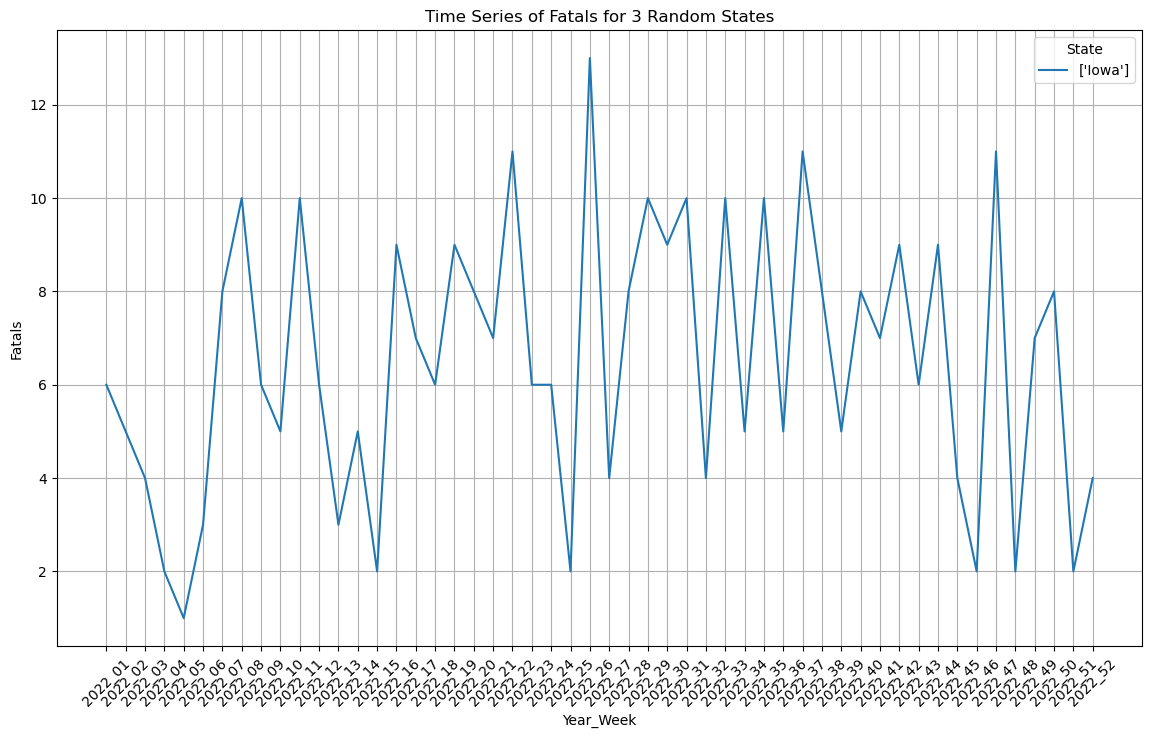

In [83]:
abt_pca['Year'] = abt_pca['Year_Week'].str[:4].astype(int)
abt_pca['Week'] = abt_pca['Year_Week'].str[5:7].astype(int)
abt_pca['Year_Week_dt'] = pd.to_datetime(abt_pca['Year'].astype(str) + abt_pca['Week'].astype(str).str.zfill(2) + '0', format='%Y%W%w')

# Selecciona 3 estados aleatorios sin repetición
state = np.random.choice(abt_pca['State'].unique(), 1, replace=False)

# Crea el gráfico y define el tamaño
plt.figure(figsize=(14, 8))

state_data = abt_pca[abt_pca['State'] == state[0]]  # Filtra los datos del estado actual
state_data = state_data.sort_values(by='Year_Week_dt')  # Ordena los datos por 'Year_Week_dt'
plt.plot(state_data['Year_Week'], state_data['Fatals'], label=state)  # Crea la gráfica de series temporales para el estado actual

# Añade etiquetas a los ejes
plt.xlabel('Year_Week')
plt.ylabel('Fatals')

# Define el título del gráfico
plt.title('Time Series of Fatals for 3 Random States')

# Define la leyenda con el nombre de cada estado
plt.legend(title='State')

# Rota las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45)

# Añade una cuadrícula para facilitar la visualización
plt.grid(True)

# Muestra el gráfico
plt.show()

In [84]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [85]:
abt_for_train = pd.DataFrame()

for state_to_analyze in abt_pca.State.unique():
    # Define las columnas
    target_column = 'Fatals' # Se define la columna que contiene el valor objetivo (target) a predecir
    #feature_columns = [f'X{i}' for i in range(1, 162)] #  Se crea una lista con los nombres de las columnas de características (features), desde X1 hasta X100
    feature_columns = abt_pca.columns.drop(['Year_Week', 'State', 'Year', 'Week', 'Year_Week_dt'])
    state_column = 'State' # Se define la columna que contiene el nombre del estado
    #state_to_analyze = 'California'  # Se define el estado que se desea analizar (se puede cambiar por otro estado)

    #  Filtra el DataFrame original (abt_pca) para quedarse solo con las filas del estado deseado
    state_df = abt_pca[abt_pca[state_column] == state_to_analyze]

    # Crea una nueva columna para cada característica con el promedio móvil a 8 semanas
    for col in feature_columns:
        state_df[f'{col}_ma8'] = state_df[col].shift(1).rolling(window=8).mean()

    # Elimina las filas que contengan valores NaN creados por el cálculo del promedio móvil
    state_df.dropna(inplace=True)

    # Normaliza las variables con una instancia de StandardScaler
    #scaler = StandardScaler()
    #state_df[[f'{col}_ma8' for col in feature_columns]] = scaler.fit_transform(state_df[[f'{col}_ma8' for col in feature_columns]])

    abt_for_train = pd.concat([state_df, abt_for_train], axis=0)

C:\Users\perez\AppData\Local\Temp\ipykernel_18688\1413315966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df[f'{col}_ma8'] = state_df[col].shift(1).rolling(window=8).mean()
C:\Users\perez\AppData\Local\Temp\ipykernel_18688\1413315966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df[f'{col}_ma8'] = state_df[col].shift(1).rolling(window=8).mean()
C:\Users\perez\AppData\Local\Temp\ipykernel_18688\1413315966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [86]:
abt_for_train = pd.get_dummies(abt_for_train, columns = ['State'])

In [87]:
abt_for_train['Year'] = abt_for_train['Year_Week'].str[:4].astype(int)
abt_for_train['Week'] = abt_for_train['Year_Week'].str[5:].astype(int)
abt_for_train['Year_Week_dt'] = pd.to_datetime(abt_for_train['Year'].astype(str) + abt_for_train['Week'].astype(str).str.zfill(2) + '0', format='%Y%W%w')

In [88]:
abt_for_train = abt_for_train.sort_values(by='Year_Week_dt')

In [89]:
abt_for_train = abt_for_train.drop(columns=['Year', 'Week', 'Year_Week_dt'])

In [90]:
ma8_columns = [f'{col}_ma8' for col in feature_columns]
state_columns = [col for col in abt_for_train.columns if col.strip().startswith('State')]

# Combina ambas listas de columnas
selected_columns = ma8_columns + state_columns

# Crea el DataFrame X con las columnas seleccionadas
X = abt_for_train[selected_columns]

In [91]:
X

Persons_ma8  Persons_Not_in_Veh_ma8  Total_Veh_ma8  Parked_Veh_ma8  \
380      2.328125                0.244792       1.558333        0.000000   
402      1.926983                0.373257       1.436160        0.048757   
404      2.029424                0.134334       1.508550        0.000000   
371      2.087228                0.134317       1.670325        0.074306   
377      2.413330                0.272552       1.679983        0.082102   
...           ...                     ...            ...             ...   
2454     2.572669                0.683036       1.536954        0.062500   
2480     2.477850                0.147592       1.674472        0.026989   
2455     2.098434                0.268629       1.527214        0.032397   
2441     1.875000                0.520833       1.458333        0.041667   
2434     2.077418                0.165601       1.570658        0.012812   

      Urban_ma8  Road_Bureau_of_Indian_Affairs_ma8  \
380    0.490625                                0.0   
402    0.560268                                0.0   
404    0.394386                                0.0   
371    0.410880                                0.0   
377    0.861779                                0.0   
...         ...                                ...   
2454   0.904514                                0.0   
2480   0.433631                                0.0   
2455   0.635644                                0.0   
2441   1.000000                                0.0   
2434   0.388829                                0.0   

      Road_Bureau_of_Land_Management_ma8  Road_Bureau_of_Reclamation_ma8  \
380                                  0.0                             0.0   
402                                  0.0                             0.0   
404                                  0.0                             0.0   
371                                  0.0                             0.0   
377                                  0.0                             0.0   
...                                  ...                             ...   
2454                                 0.0                             0.0   
2480                                 0.0                             0.0   
2455                                 0.0                             0.0   
2441                                 0.0                             0.0   
2434                                 0.0                             0.0   

      Road_City_or_Municipal_Highway_Agency_ma8  \
380                                    0.036458   
402                                    0.180229   
404                                    0.197944   
371                                    0.301685   
377                                    0.028125   
...                                         ...   
2454                                   0.224454   
2480                                   0.134348   
2455                                   0.140495   
2441                                   1.000000   
2434                                   0.128756   

      Road_County_Highway_Agency_ma8  Road_Indian_Tribe_Nation_ma8  \
380                         0.206250                           0.0   
402                         0.227085                           0.0   
404                         0.137270                           0.0   
371                         0.137592                           0.0   
377                         0.092614                           0.0   
...                              ...                           ...   
2454                        0.000000                           0.0   
2480                        0.161368                           0.0   
2455                        0.320484                           0.0   
2441                        0.000000                           0.0   
2434                        0.207212                           0.0   

      Road_Local_Park_Forest_or_Reservation_Agency_ma8  \
380                

In [92]:
# Crea un DataFrame y que contiene la columna del valor objetivo (target)
y = abt_for_train[target_column]

In [93]:
# Split train/test en el 30% final de los datos
train_size = int(len(X) * 0.7) # Calcula el tamaño del conjunto de entrenamiento (70% de los datos)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:] # Divide los DataFrames X e Y en conjuntos de entrenamiento (las primeras filas) y prueba (las últimas filas)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:] # Separa los valores del target en entrenamiento y prueba

In [94]:
# Crea y entrena el modelo con una instancia de RandomForestRegressor, un modelo de aprendizaje automático para regresión
model = RandomForestRegressor(n_estimators=15, max_depth=20)
model.fit(X_train, y_train) # Entrena el modelo con los datos de entrenamiento

RandomForestRegressor(max_depth=20, n_estimators=15)

In [95]:
# Realiza predicciones sobre el conjunto de prueba utilizando el modelo entrenado
y_pred = model.predict(X_test)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
# Calcula el error cuadrático medio (MSE) entre los valores reales del target en el conjunto de prueba y las predicciones
mse = mean_squared_error(y_test, y_pred)

# Calcula el error absoluto medio (MAE) entre los valores reales del target en el conjunto de prueba y las predicciones
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²) entre los valores reales del target en el conjunto de prueba y las predicciones
r2 = r2_score(y_test, y_pred)

In [98]:
mse, mae, r2

(38.30122261606182, 4.268930239726265, 0.8960028905151228)

In [99]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el scaler y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir el resultado de nuevo a un DataFrame para una mejor interpretación
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_columns)

In [100]:
# Split train/test en el 30% final de los datos
train_size = int(len(X) * 0.7) # Calcula el tamaño del conjunto de entrenamiento (70% de los datos)
X_train, X_test = X_scaled_df.iloc[:train_size], X_scaled_df.iloc[train_size:] # Divide los DataFrames X e Y en conjuntos de entrenamiento (las primeras filas) y prueba (las últimas filas)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:] # Separa los valores del target en entrenamiento y prueba

In [101]:
# Crea y entrena el modelo con una instancia de RandomForestRegressor, un modelo de aprendizaje automático para regresión
model = RandomForestRegressor(n_estimators=15, max_depth=20)
model.fit(X_train, y_train) # Entrena el modelo con los datos de entrenamiento

RandomForestRegressor(max_depth=20, n_estimators=15)

In [102]:
# Realiza predicciones sobre el conjunto de prueba utilizando el modelo entrenado
y_pred = model.predict(X_test)

In [103]:
# Calcula el error cuadrático medio (MSE) entre los valores reales del target en el conjunto de prueba y las predicciones
mse = mean_squared_error(y_test, y_pred)

# Calcula el error absoluto medio (MAE) entre los valores reales del target en el conjunto de prueba y las predicciones
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²) entre los valores reales del target en el conjunto de prueba y las predicciones
r2 = r2_score(y_test, y_pred)

In [104]:
mse, mae, r2

(37.08341269773631, 4.2321067465243605, 0.8993095398270108)

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train) #X_train normalizado
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\perez\anaconda3\envs\final_project\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
596 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\perez\anaconda3\envs\final_project\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\perez\anaconda3\envs\final_project\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\perez\anaconda3\envs\final_project\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    va

In [106]:
# Calcula el error cuadrático medio (MSE) entre los valores reales del target en el conjunto de prueba y las predicciones
mse = mean_squared_error(y_test, y_pred)

# Calcula el error absoluto medio (MAE) entre los valores reales del target en el conjunto de prueba y las predicciones
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²) entre los valores reales del target en el conjunto de prueba y las predicciones
r2 = r2_score(y_test, y_pred)

In [107]:
mse, mae, r2

(50.166835296098085, 5.066262362214208, 0.8637848740470689)

### Next 8 weeks prediction

In [108]:
# Predecir las próximas 8 semanas

In [109]:
import pandas as pd
from datetime import datetime, timedelta


In [110]:
abt_for_train

Year_Week   Persons  Persons_Not_in_Veh  Total_Veh  Parked_Veh     Urban  \
380    2022_08  3.363636            0.000000   2.090909    0.272727  0.363636   
402    2022_08  2.700000            0.300000   1.400000    0.000000  0.700000   
404    2022_08  2.857143            0.142857   1.571429    0.000000  0.285714   
371    2022_08  2.000000            0.133333   1.533333    0.000000  0.333333   
377    2022_08  3.200000            0.300000   1.700000    0.000000  0.900000   
...        ...       ...                 ...        ...         ...       ...   
2454   2022_52  2.142857            0.285714   1.571429    0.000000  0.714286   
2480   2022_52  3.250000            0.250000   1.500000    0.000000  0.500000   
2455   2022_52  1.833333            0.444444   1.500000    0.000000  0.555556   
2441   2022_52  3.000000            3.000000   3.000000    1.000000  1.000000   
2434   2022_52  2.214286            0.071429   1.500000    0.071429  0.571429   

      Road_Bureau_of_Indian_Affairs  Road_Bureau_of_Land_Management  \
380                             0.0                             0.0   
402                             0.0                             0.0   
404                             0.0                             0.0   
371                             0.0                             0.0   
377                             0.0                             0.0   
...                             ...                             ...   
2454                            0.0                             0.0   
2480                            0.0                             0.0   
2455                            0.0                             0.0   
2441                            0.0                             0.0   
2434                            0.0                             0.0   

      Road_Bureau_of_Reclamation  Road_City_or_Municipal_Highway_Agency  \
380                          0.0                               0.090909   
402                          0.0                               0.400000   
404                          0.0                               0.000000   
371                          0.0                               0.200000   
377                          0.0                               0.000000   
...                          ...                                    ...   
2454                         0.0                               0.142857   
2480                         0.0                               0.000000   
2455                         0.0                               0.111111   
2441                         0.0                               1.000000   
2434                         0.0                               0.214286   

      Road_County_Highway_Agency  Road_Indian_Tribe_Nation  \
380                     0.272727                       0.0   
402                     0.300000                       0.0   
404                     0.000000                       0.0   
371                     0.133333                       0.0   
377                     0.100000                       0.0   
...                          ...                       ...   
2454                    0.000000                       0.0   
2480                    0.500000                       0.0   
2455                    0.277778                       0.0   
2441                    0.000000                       0.0   
2434                    0.214286                       0.0   

      Road_Local_Park_Forest_or_Reservation_Agency  Road_Local_Toll_Auth  \
380                                            0.0                   0.0   
402                                            0.0                   0.0   
404                                            0.0                   0.0   
371                                            0.0                   0.0   
377                                            0.0                   0.0   
...                                            ...                   ...   
2

In [111]:
# Supongamos que tienes tu dataframe `abt_for_train` y tu modelo `best_model`

# Primero, obtenemos la última fecha de tu dataframe
"""last_date = abt_for_train['Year_Week'].max()
year, week = map(int, last_date.split('_'))
last_date = datetime.strptime(f'{year}-W{week}-1', "%Y-W%W-%w")
last_date = pd.to_datetime(last_date)"""

'last_date = abt_for_train[\'Year_Week\'].max()\nyear, week = map(int, last_date.split(\'_\'))\nlast_date = datetime.strptime(f\'{year}-W{week}-1\', "%Y-W%W-%w")\nlast_date = pd.to_datetime(last_date)'

In [112]:
# Creamos un dataframe para almacenar las predicciones futuras
"""future_predictions_2 = pd.DataFrame()"""

'future_predictions_2 = pd.DataFrame()'

In [113]:
total_final_predictions = pd.DataFrame()

In [114]:
feature_importances = best_model.feature_importances_

In [115]:
feature_importances_df = pd.DataFrame({ 'Feature': selected_columns, 'Importance': feature_importances })

In [116]:
# Función para verificar si una columna hace referencia a un estado
def is_state_column(column_name):
    return column_name.startswith('State_')

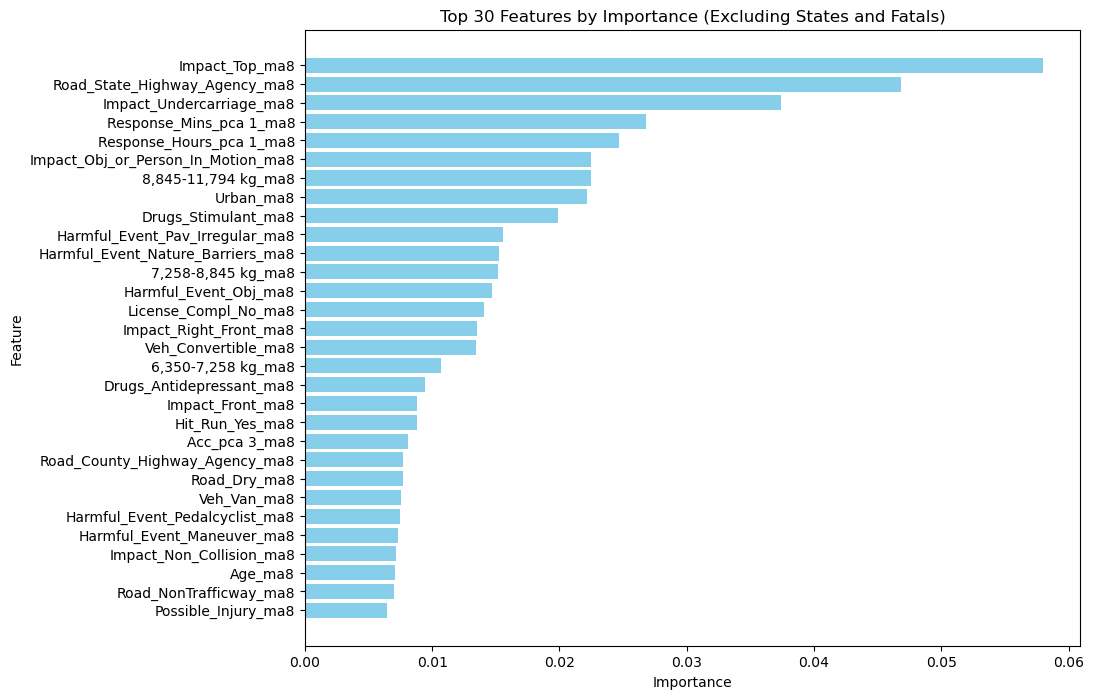

In [117]:
# Ordenar el DataFrame por la columna 'Importance' de mayor a menor
sorted_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Excluir las columnas que son de estados o contienen 'Fatals'
non_state_or_fatals_columns = sorted_df[~sorted_df['Feature'].str.startswith('State_') & ~sorted_df['Feature'].str.contains('Fatals')]

# Seleccionar los primeros 30 Feature excluyendo los estados y 'Fatals'
top_30_non_state_or_fatals_df = non_state_or_fatals_columns.head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(top_30_non_state_or_fatals_df['Feature'], top_30_non_state_or_fatals_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Features by Importance (Excluding States and Fatals)')
plt.gca().invert_yaxis()  # Invertir el eje y para que el Feature con mayor Importance esté arriba
plt.show()

In [146]:
for state_col in state_columns:

    state = state_col.split('_')[1]  # Extraer el nombre del estado

    state_data = abt_for_train[abt_for_train['State_' + state] == True]
    state_data['Year'] = state_data['Year_Week'].str[:4].astype(int)
    state_data['Week'] = state_data['Year_Week'].str[5:7].astype(int)
    state_data['Year_Week_dt'] = pd.to_datetime(state_data['Year'].astype(str) + state_data['Week'].astype(str).str.zfill(2) + '0', format='%Y%W%w')
    last_date = state_data['Year_Week_dt'].max()

    for i in range(1, 9):

        # Creamos un dataframe para almacenar las predicciones futuras
        future_predictions_2 = pd.DataFrame()

        # La fecha de la semana a predecir
        next_week_date = last_date + timedelta(weeks=i)

        # Crear un nuevo registro para la próxima semana
        new_record = {}

        # Añadir el promedio móvil de 8 semanas para cada característica
        for col in feature_columns:
            new_record[f'{col}_ma8'] = state_data[col].shift(1).rolling(window=8).mean().iloc[-1]

        # Añadir las columnas de estado binario
        for col in state_columns:
            new_record[col] = 1 if col == state_col else 0

        # Añadir la fecha de la semana
        new_record['Year_Week_dt'] = next_week_date

        # Convertir el registro en dataframe y añadirlo al dataframe del estado
        new_record_df = pd.DataFrame([new_record])
        state_data_temp = pd.concat([state_data, new_record_df], ignore_index=True)

        # Escalar las características (utilizar scaler entrenado anteriormente)
        scaled_features = scaler.transform(state_data_temp[selected_columns].iloc[-1:].values)

        # Realizar la predicción
        prediction = best_model.predict(scaled_features)

        # Añadir la predicción al nuevo registro
        new_record['Prediction'] = prediction[0]

        # Añadir la predicción a las predicciones futuras
        future_predictions_2 = pd.concat([future_predictions_2, pd.DataFrame([new_record])])

        future_predictions_2.columns = future_predictions_2.columns.str.replace('_ma8', '')

        abt_for_artificial_predictions = pd.concat([state_data, future_predictions_2])

        abt_for_artificial_predictions['Year_Week'] = abt_for_artificial_predictions['Year_Week_dt'].dt.isocalendar().year.astype(str) + '_' + abt_for_artificial_predictions['Year_Week_dt'].dt.isocalendar().week.astype(str).str.zfill(2)

        abt_for_artificial_predictions['State'] = state[0]

        abt_for_artificial_predictions = abt_for_artificial_predictions.fillna(0)

        state_data = abt_for_artificial_predictions

    total_final_predictions = pd.concat([state_data, total_final_predictions], axis=0)


C:\Users\perez\AppData\Local\Temp\ipykernel_18688\3786574337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Year'] = state_data['Year_Week'].str[:4].astype(int)
C:\Users\perez\AppData\Local\Temp\ipykernel_18688\3786574337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Week'] = state_data['Year_Week'].str[5:7].astype(int)
C:\Users\perez\AppData\Local\Temp\ipykernel_18688\3786574337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [179]:
# Obtener el nombre de las columnas de estado
state_columns = total_final_predictions.columns[321:372]

In [198]:
# Crear una lista para almacenar los datos de cada fila después del filtrado
filtered_data = []

In [199]:
# Iterar sobre cada fila del DataFrame original
for index, row in total_final_predictions.iterrows():
    # Iterar sobre cada columna de estado
    for state_col in state_columns:
        # Si el valor en la columna de estado es 1, agregar los datos a la lista filtrada
        if row[state_col] == 1:
            filtered_data.append({'Date': row['Year_Week_dt'], 'State': state_col.split('_')[1], 'Prediction': row['Prediction']})
            break  # Salir del bucle una vez que se encuentre el estado deseado

In [200]:
# Crear un DataFrame a partir de los datos filtrados
final_df = pd.DataFrame(filtered_data)

In [202]:
final_df

Date    State  Prediction
0     2022-04-10  Wyoming    0.000000
1     2022-04-17  Wyoming    0.000000
2     2022-04-24  Wyoming    0.000000
3     2022-05-01  Wyoming    0.000000
4     2022-05-08  Wyoming    0.000000
...          ...      ...         ...
14887 2023-01-29  Alabama   14.875952
14888 2023-02-05  Alabama   13.662000
14889 2023-02-12  Alabama   13.391333
14890 2023-02-19  Alabama   15.192000
14891 2023-02-26  Alabama   15.313333

[14892 rows x 3 columns]

In [ ]:
# Exporta el dataframe de predicciones a un .csv

# Obtiene la ruta absoluta del directorio base del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))

# Define el directorio donde se guarda el archivo .csv
dataout_directory = os.path.join(project_root, 'final_project', 'data', 'dataout')

# Asegura que el directorio existe y, si no, lo crea
os.makedirs(dataout_directory, exist_ok=True)

# Define la ruta completa del archivo .csv
file_path = os.path.join(dataout_directory, 'total_final_predictions.csv')

# Exporta el dataframe a un archivo .csv
total_final_predictions.to_csv(file_path, index=False)

print(f'Dataframe successfully exported to {file_path}')

Dataframe successfully exported to c:\Users\perez\OneDrive\Documentos\GitHub\Proyectos\final_project\final_project\data\dataout\total_final_predictions.csv


In [186]:
states = [col.split('_')[1] for col in state_columns]

In [188]:
values = [total_final_predictions[col] for col in state_columns]

In [190]:
final_predictions_df = pd.DataFrame({'Date': total_final_predictions['Year_Week_dt']})    

In [191]:
for state, value in zip(states, values):
    final_predictions_df[state] = value

In [192]:
final_predictions_df

Date  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
677 2022-04-10        0       0        0         0           0         0   
723 2022-04-17        0       0        0         0           0         0   
770 2022-04-24        0       0        0         0           0         0   
817 2022-05-01        0       0        0         0           0         0   
865 2022-05-08        0       0        0         0           0         0   
..         ...      ...     ...      ...       ...         ...       ...   
0   2023-01-29        1       0        0         0           0         0   
0   2023-02-05        1       0        0         0           0         0   
0   2023-02-12        1       0        0         0           0         0   
0   2023-02-19        1       0        0         0           0         0   
0   2023-02-26        1       0        0         0           0         0   

     Connecticut  Delaware  District of Columbia  Florida  Georgia  Hawaii  \
677            0         0                     0        0        0       0   
723            0         0                     0        0        0       0   
770            0         0                     0        0        0       0   
817            0         0                     0        0        0       0   
865            0         0                     0        0        0       0   
..           ...       ...                   ...      ...      ...     ...   
0              0         0                     0        0        0       0   
0              0         0                     0        0        0       0   
0              0         0                     0        0        0       0   
0              0         0                     0        0        0       0   
0              0         0                     0        0        0       0   

     Idaho  Illinois  Indiana  Iowa  Kansas  Kentucky  Louisiana  Maine  \
677      0         0        0     0       0         0          0      0   
723      0         0        0     0       0         0          0      0   
770      0         0        0     0       0         0          0      0   
817      0         0        0     0       0         0          0      0   
865      0         0        0     0       0         0          0      0   
..     ...       ...      ...   ...     ...       ...        ...    ...   
0        0         0        0     0       0         0          0      0   
0        0         0        0     0       0         0          0      0   
0        0         0        0     0       0         0          0      0   
0        0         0        0     0       0         0          0      0   
0        0         0        0     0       0         0          0      0   

     Maryland  Massachusetts  Michigan  Minnesota  Mississippi  Missouri  \
677         0              0         0          0            0         0   
723         0              0         0          0            0         0   
770         0              0         0          0            0         0   
817         0              0         0          0            0         0   
865         0              0         0          0            0         0   
..        ...            ...       ...        ...          ...       ...   
0           0              0         0          0            0         0   
0           0              0         0          0            0         0   
0           0              0         0          0            0         0   
0           0              0         0          0            0         0   
0           0              0         0          0            0         0   

     Montana  Nebraska  Nevada  New Hampshire  New Jersey  New Mexico  \
677        0         0       0              0           0           0   
723        0         0       0              0           0           0   
770        0         0       0              0           0           0   
817        0         0       0              0         

In [129]:
# Exporta el dataframe de predicciones a un .csv

# Obtiene la ruta absoluta del directorio base del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))

# Define el directorio donde se guarda el archivo .csv
dataout_directory = os.path.join(project_root, 'final_project', 'data', 'dataout')

# Asegura que el directorio existe y, si no, lo crea
os.makedirs(dataout_directory, exist_ok=True)

# Define la ruta completa del archivo .csv
file_path = os.path.join(dataout_directory, 'total_final_predictions.csv')

# Exporta el dataframe a un archivo .csv
total_final_predictions.to_csv(file_path, index=False)

print(f'Dataframe successfully exported to {file_path}')

Dataframe successfully exported to c:\Users\perez\OneDrive\Documentos\GitHub\Proyectos\final_project\final_project\data\dataout\total_final_predictions.csv
